# Exercise Set 7

Due: **9:30 23 May 2022**

Discussion: **13:00 27 May 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

# 1. Kendall's tau coefficient [40 Points]

In statistics, the Kendall rank correlation coefficient, commonly referred to as Kendall’s tau coefficient (after the Greek letter $\tau$), is a statistic used to measure the ordinal association between two measured quantities. A tau test is a non-parametric hypothesis test for statistical dependence based on the tau coefficient. Spearman’s rank correlation is satisfactory for testing a null hypothesis of independence between two variables but it is difficult to interpret when the null hypothesis is rejected. Kendall’s rank correlation improves upon this by reflecting the strength of the dependence between the variables being compared.

Consider two samples, $x$ and $y$, each of size $n$. The total number of possible pairings of $x$ with $y$ observations is $\frac{n(n-1)}{2}$. Now consider pairs of ordered observations $(x_i, y_i)$ and $(x_j, y_j)$ with $i=1,\ldots n-1$ and $j=i+1,\ldots, n$. Then $x_1 \leq x_2 \leq \ldots \leq x_n$. Now pair $1$ is compared with every other pair $(2,3,,,n)$, Pair $2$ with all following pairs $(3,4,,,n)$ and so on. In total $\frac{n(n-1)}{2}$ pairs are compared. If for a pair:

- $x_i<x_j$ and $y_i<y_j$, it is concordant
- $x_i<x_j$ and $y_i>y_j$, it is disconcordant
- $x_i \ne x_j$ and $y_i=y_j$, it has a binding in $Y$
- $x_i = x_j$ and $y_i\ne y_j$, it has a binding in $X$
- $x_i = x_j$ and $y_i=y_j$, it has a binding in $X$ and $Y$

\newpage

The number of pairs that are:

- concordant are $C$
- disconcordant are $D$
- having a binding in $Y$ are $T_Y$
- having a binding in $X$ are $T_X$
- having a binding in $X$ and $Y$ are $T_{XY}$

Kendall's tau value compares the number of concordant and disconcordant pairs:

$\tau = \dfrac{C-D}{\sqrt{(C+D+T_X)(C+D+T_Y)}}$

The denominator is the total number of pair combinations, so the coefficient must be in the range $-1 \leq \tau \leq 1$. If the agreement between the two rankings is perfect (when the two rankings are the same) the coefficient has value $1$. If the disagreement between the two rankings is perfect (when one ranking is the reverse of the other) the coefficient has value $-1$.

Use the data file `hubble.dat`, which includes dataset $x$ in the first column and dataset $y$ in the second column.

In [1]:
import pandas as pd
from math import sqrt
import scipy.stats
import numpy as np

df = pd.read_csv('hubbledat.sec',names=['x','y'],sep='\s+')

**a.** Take the data and reorder it such that $x_1 \leq x_2 \leq \ldots \leq x_n$. **10 Points**

Using the funciont sort_values(by = 'x'), we can order the data by the value of x:

In [2]:
df1=df.sort_values(by = 'x',ignore_index = True)
df1
print(df1)

       x       y
0   0.03   -83.3
1   0.04   111.1
2   0.19    97.2
3   0.25    27.8
4   0.26  -208.3
5   0.27   -69.4
6   0.42   819.4
7   0.50   819.4
8   0.50   958.3
9   0.63   666.7
10  0.79   777.8
11  0.88   888.9
12  0.89   194.4
13  0.89   430.6
14  0.91  1222.2
15  1.01  1736.1
16  1.10  1472.2
17  1.11  1166.7
18  1.42  1263.9
19  1.70  2111.1
20  2.01  1611.1
21  2.02  1763.9
22  2.02  1111.1
23  2.02  2250.0


**b.** Compute the number of concordant pairs $C$, disconcordant pairs $D$, bound pairs $T_X$, $T_Y$, and $T_{XY}$. **10 Points**

Now consider pairs of ordered observations $(x_i, y_i)$ and $(x_j, y_j)$ with $i=1,\ldots n-1$ and $j=i+1,\ldots, n$. Then $x_1 \leq x_2 \leq \ldots \leq x_n$.

- $x_i<x_j$ and $y_i<y_j$, it is concordant
- $x_i<x_j$ and $y_i>y_j$, it is disconcordant
- $x_i \ne x_j$ and $y_i=y_j$, it has a binding in $Y$
- $x_i = x_j$ and $y_i\ne y_j$, it has a binding in $X$
- $x_i = x_j$ and $y_i=y_j$, it has a binding in $X$ and $Y$

In [3]:
n = len(df)
df1_x =df1['x']
df1_y =df1['y']
C, D, Tx, Ty, Txy =0, 0, 0, 0, 0
for i in range(n-1):
    for j in range(i+1,n):
        if df1_x[i] == df1_x[j]:
            if df1_y[i] == df1_y[j]:
                Txy+=1
            else:
                Tx+=1
        else:
            if df1_y[i] == df1_y[j]:
                Ty+=1
            elif df1_y[i] < df1_y[j]:
                C+=1
            else:
                D+=1
print('C='+str(C)+' D=',str(D)+' Tx='+str(Tx)+' Ty='+str(Ty)+' Txy='+str(Txy))               

C=225 D= 45 Tx=5 Ty=1 Txy=0


**c.** Compute $\tau$. **10 Points**

$\tau = \dfrac{C-D}{\sqrt{(C+D+T_X)(C+D+T_Y)}}$

Using the equation above, we can get $\tau$:

In [4]:
tau = (C-D)/sqrt((C+D+Tx)*(C+D+Ty))
print(r'tau = ',tau)

tau =  0.6593583535858748


In [5]:
df1_x.corr(df1_y,method = 'kendall') #method by Scipy algorithm

0.6593583535858745

**d.** How should the derived $\tau$ be interpreted (what does it tell about the two datasets)? Plot the dataset $x$ vs. $y$ and compare it with $\tau$ **10 Points**

In [6]:
x = df1_x.to_numpy()
y = df1_y.to_numpy()

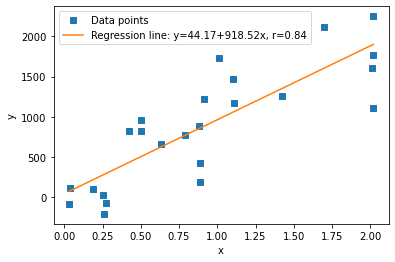

In [7]:
import matplotlib.pyplot as plt

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

Pearson correlation value r = 0.84  >  Kendall's tau coefficient $\tau=0.66$

$\tau = 0.6593583535858748>0$, which means that the data are concordant to some extent

# 2. Permutation tests [40 Points]

This exercise uses the data file `4point2.dat`. The data in the file are 20 uncorrelated $(x,y)$ pairs, followed by 20 correlated pairs.

In [8]:
import pandas as pd
from math import sqrt
import scipy.stats

df = pd.read_csv('4point2dat.sec',names=['x','y'])


**a.** Take the uncorrelated pairs $(x,y)$ and compute the values for the Kendall and Spearman rank correlation coefficients and the Peason/Fischer r correlation coefficient. Why are they different? **20 Points**
 
 > (This is a good example why we should not blindly rely on the Peason's correlation coefficient)

In [9]:
df_uncor = df[0:20] 
df_cor = df[20:]
df_uncor

,x,y
0,-0.944886,-0.744213
1,1.670196,-1.097878
2,0.184784,1.302916
3,-0.003778,0.617931
4,0.170750,0.863466
5,0.343498,-1.358467
6,-0.913464,1.479890
7,0.289166,-1.006947
8,-0.342163,-0.002056
9,-0.088451,-0.361488


Text(4.4, 6, 'outlier')

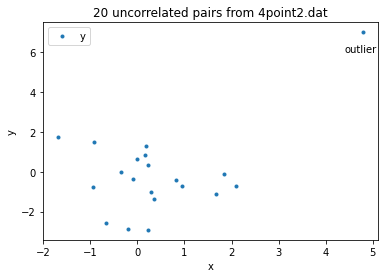

In [10]:
ax=df_uncor.plot(x='x',y='y',style='.')
ax.set_ylabel('y')
ax.set_title('20 uncorrelated pairs from 4point2.dat')
ax.text(x=4.4,y=6, s= 'outlier')

Text(-6, -10, 'outlier')

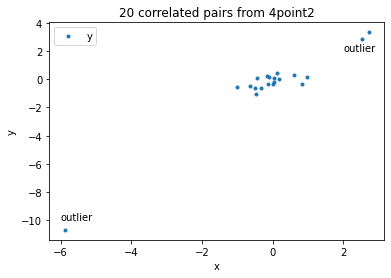

In [11]:
ax=df_cor.plot(x='x',y='y',style='.')
ax.set_ylabel('y')
ax.set_title('20 correlated pairs from 4point2')
ax.text(x=2,y=2, s= 'outlier')
ax.text(x=-6,y=-10, s= 'outlier')

In [12]:
corr_by_kendall = df_uncor.corr(method = 'kendall')['x']['y']
corr_by_spearman = df_uncor.corr(method = 'spearman')['x']['y']
corr_by_pearson = df_uncor.corr(method = 'pearson')['x']['y']
print('correlation values by kendall ',corr_by_kendall)
print('correlation values by spearman',corr_by_spearman)
print('correlation value by pearson   ',corr_by_pearson)

correlation values by kendall  -0.06315789473684211
correlation values by spearman -0.08270676691729323
correlation value by pearson    0.4866552193293829


The reason why pearson coeffient is much larger than the coeffient by kendall or spearman is that the pearson coeffient is really sensitive to outliers, but the other two is not. In order to neglect the effect of outliers, we should also consider the coeffient by kendall or spearman, which can better represent the correlation between pairs in this case. 

**b.** By permutation methods we want to derive distributions of Fisher $r$, Spearman’s and Kendall’s statistics. To do this, first we take the uncorrelated data set and randomly assign $x$-values to $y$-values to make new pairs. This should give the range of values of the test statistic which are consistent with there being no correlation. There are $20!$ distinct permutations for even this little dataset. Compute your results for 1000 of these at random. (This is achieved by sampling without replacement from the set of 20 $X$'s and assigning each one in order to the set of $Y$'s) For each of the 1000 random samples compute their Fisher $r$ value, Spearman’s and Kendall’s statistics and plot their cumulative distributions. Explain what the obtained plots tell. **20 Points**

**For Uncorrelated Data**

In [13]:
#Create arrays to store the correlation coefficients
pearson_coefficients = np.empty(1000)
spearman_coefficients = np.empty(1000)
kendall_coefficients = np.empty(1000)

In [14]:
for i in range(1000):
    df_uncor['y'] = df_uncor['y'].sample(frac = 1, axis=0).reset_index().iloc[:,1]
    pearson_coefficients[i] = df_uncor.corr(method = 'pearson')['x']['y']
    spearman_coefficients[i] = df_uncor.corr(method = 'spearman')['x']['y']
    kendall_coefficients[i] = df_uncor.corr(method = 'kendall')['x']['y']


C:\Users\XIONGX~1\AppData\Local\Temp/ipykernel_44124/1236859818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uncor['y'] = df_uncor['y'].sample(frac = 1, axis=0).reset_index().iloc[:,1]


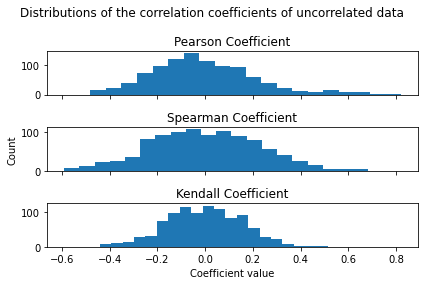

In [15]:
fig, axs = plt.subplots(3, sharex=True)
data_uncor = [pearson_coefficients, spearman_coefficients, kendall_coefficients]
fig.suptitle('Distributions of the correlation coefficients of uncorrelated data')

axs[0].hist(pearson_coefficients, bins = 20)
axs[0].set_title("Pearson Coefficient")
axs[1].hist(spearman_coefficients, bins = 20)
axs[1].set_title("Spearman Coefficient")
axs[2].hist(kendall_coefficients, bins = 20)
axs[2].set_title("Kendall Coefficient")
axs[2].set_xlabel("Coefficient value")
axs[1].set_ylabel("Count")
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout()
plt.savefig('hist_uncor.jpg')
plt.show()


C:\Users\XIONGX~1\AppData\Local\Temp/ipykernel_44124/1887047224.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  Histogram[i], Bins[i]= np.histogram(data_uncor[i] , bins = 20, normed=True)


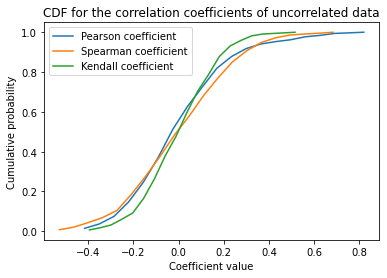

In [16]:
Histogram = np.empty(3, dtype=object)
Bins = np.empty(3, dtype=object)
dx=np.empty(3, dtype=object)
CDF = np.empty(3, dtype=object)
for i in range(3):
    Histogram[i], Bins[i]= np.histogram(data_uncor[i] , bins = 20, normed=True)
    dx[i] = Bins[i][1] - Bins[i][0]
    CDF[i] = np.cumsum(Histogram[i])*dx[i]
    
    
plt.title("CDF for the correlation coefficients of uncorrelated data")
plt.xlabel("Coefficient value")
plt.ylabel("Cumulative probability")
plt.plot(Bins[0][1:], CDF[0], label = "Pearson coefficient")
plt.plot(Bins[1][1:], CDF[1], label = "Spearman coefficient")
plt.plot(Bins[2][1:], CDF[2], label = "Kendall coefficient")
plt.legend()
plt.savefig('CDF_uncor.jpg')

**c.** Now take the correlated set of data and do the same as **b)**. Interprete the results with comparing the plots of uncorrelated datasets. **20 Points**

**For Correlated Data**

In [17]:
#Create arrays to store the correlation coefficients
pearson_coefficients_cor = np.empty(1000)
spearman_coefficients_cor = np.empty(1000)
kendall_coefficients_cor = np.empty(1000)

In [18]:
df_cor = df_cor.reset_index(drop='True')
for i in range(1000):
    df_cor['y'] = df_cor['y'].sample(frac = 1, axis=0).reset_index().iloc[:,1]
    pearson_coefficients_cor[i] = df_cor.corr(method = 'pearson')['x']['y']
    spearman_coefficients_cor[i] = df_cor.corr(method = 'spearman')['x']['y']
    kendall_coefficients_cor[i] = df_cor.corr(method = 'kendall')['x']['y']

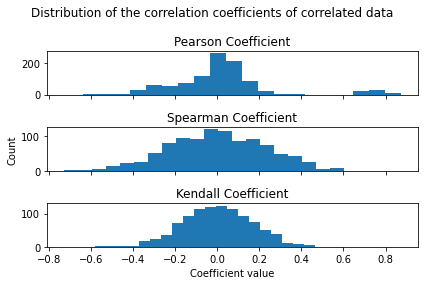

In [19]:
fig, axs = plt.subplots(3, sharex=True)
data = [pearson_coefficients_cor, spearman_coefficients_cor, kendall_coefficients_cor]
fig.suptitle('Distribution of the correlation coefficients of correlated data')

axs[0].hist(pearson_coefficients_cor, bins = 20)
axs[0].set_title("Pearson Coefficient")
axs[1].hist(spearman_coefficients_cor, bins = 20)
axs[1].set_title("Spearman Coefficient")
axs[2].hist(kendall_coefficients_cor, bins = 20)
axs[2].set_title("Kendall Coefficient")
axs[2].set_xlabel("Coefficient value")
axs[1].set_ylabel("Count")
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout()
plt.savefig('hist_cor.jpg')
plt.show()

C:\Users\XIONGX~1\AppData\Local\Temp/ipykernel_44124/3046025945.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  Histogram_cor[i], Bins_cor[i]= np.histogram(data[i] , bins = 20, normed = True )


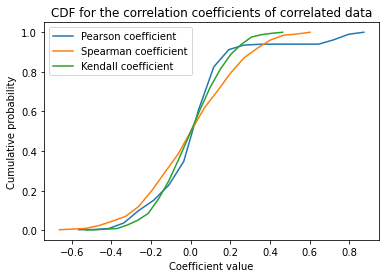

In [20]:
Histogram_cor = np.empty(3, dtype=object)
Bins_cor = np.empty(3, dtype=object)
dx_cor=np.empty(3, dtype=object)
CDF_cor = np.empty(3, dtype=object)
for i in range(3):
    Histogram_cor[i], Bins_cor[i]= np.histogram(data[i] , bins = 20, normed = True )
    dx_cor[i] = Bins_cor[i][1] - Bins_cor[i][0]
    CDF_cor[i] = np.cumsum(Histogram_cor[i])*dx_cor[i]
plt.title("CDF for the correlation coefficients of correlated data")
plt.xlabel("Coefficient value")
plt.ylabel("Cumulative probability")
plt.plot(Bins_cor[0][1:], CDF_cor[0], label = "Pearson coefficient")
plt.plot(Bins_cor[1][1:], CDF_cor[1], label = "Spearman coefficient")
plt.plot(Bins_cor[2][1:], CDF_cor[2], label = "Kendall coefficient")
plt.legend()
plt.savefig('CDF_cor.jpg')

**Comparison**

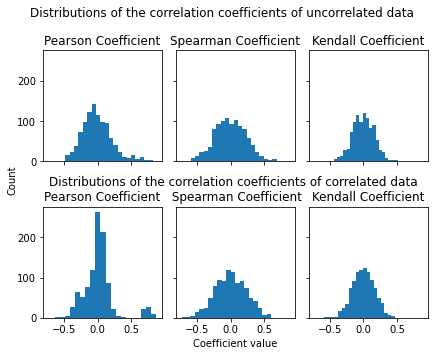

In [21]:
fig, axs = plt.subplots(2,3, sharex=True, sharey=True, figsize=(6,5))
fig.suptitle('Distributions of the correlation coefficients of uncorrelated data')

axs[0][0].hist(pearson_coefficients, bins = 20)
axs[0][0].set_title("Pearson Coefficient")
axs[0][1].hist(spearman_coefficients, bins = 20)
axs[0][1].set_title("Spearman Coefficient")
axs[0][2].hist(kendall_coefficients, bins = 20)
axs[0][2].set_title("Kendall Coefficient")
axs[0][2].set_xlabel("Coefficient value")
axs[0][2].set_ylabel("Count")
axs[1][0].hist(pearson_coefficients_cor, bins = 20)
axs[1][0].set_title("Pearson Coefficient")
axs[1][1].hist(spearman_coefficients_cor, bins = 20)
axs[1][1].set_title("Distributions of the correlation coefficients of correlated data \n Spearman Coefficient")
axs[1][2].hist(kendall_coefficients_cor, bins = 20)
axs[1][2].set_title("Kendall Coefficient")
axs[1][1].set_xlabel("Coefficient value")
#axs[1][1].set_ylabel("Count")
fig.text(0.002, 0.5, 'Count', va='center', rotation='vertical')
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout()
plt.savefig('hist_all.jpg')
plt.show()

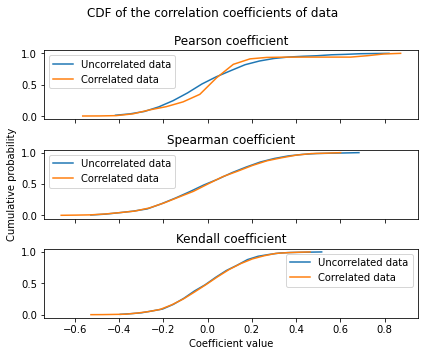

In [23]:
data_uncor = [pearson_coefficients, spearman_coefficients, kendall_coefficients]
data_cor = [pearson_coefficients_cor, spearman_coefficients_cor, kendall_coefficients_cor]

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(6,5))
fig.suptitle('CDF of the correlation coefficients of data')
axs[0].set_title("Pearson coefficient")
axs[1].set_title("Spearman coefficient")
axs[2].set_title("Kendall coefficient")

axs[0].plot(Bins[0][1:], CDF[0], label = "Uncorrelated data")
axs[1].plot(Bins[1][1:], CDF[1], label = "Uncorrelated data")
axs[2].plot(Bins[2][1:], CDF[2], label = "Uncorrelated data")
axs[0].plot(Bins_cor[0][1:], CDF_cor[0], label = "Correlated data")
axs[1].plot(Bins_cor[1][1:], CDF_cor[1], label = "Correlated data")
axs[2].plot(Bins_cor[2][1:], CDF_cor[2], label = "Correlated data")
axs[2].set_xlabel("Coefficient value")
axs[1].set_ylabel("Cumulative probability")
axs[0].legend()
axs[1].legend()
axs[2].legend()
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout()
plt.savefig('CDF_cor.jpg')

1.Peak is around 0, there is no strong correlation in most of the case. 

2.The range of three types of coeffcients are different, Pearson coefficients range is larger than the other's.

In the correlated dataset, there is no datapoint of 0.5 pearson coeffcients. 

And in the CDF plots, there is difference in the Pearson coefficients, and the slope of correlated data is larger than the other in the range between -0.2 and 0.3.

All because of outliers.